In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
#https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_health_and_lifestyle_dataset.csv')
df.head()


Mounted at /content/drive


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
from pandas._libs.hashtable import unique_label_indices
print(df.columns)

categorical_df = df[['Person ID', 'Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']]
numerical_df = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps']]



Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [ ]:
numerical_df.describe()

#Blood Pressure is not shown in the 'describe' table because program doesnt see it as an integer


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


<Axes: title={'center': 'BMI qualification of interviewees'}, ylabel='BMI'>

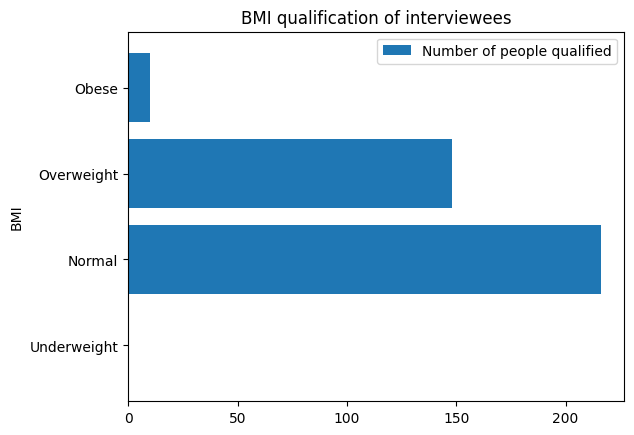

In [ ]:
extracted_data =[['Underweight', df['BMI Category'].str.contains('Underweight', regex = False).sum()],
['Normal', df['BMI Category'].str.contains('Normal', regex = False).sum()],
['Overweight', df['BMI Category'].str.contains('Overweight', regex = False).sum()],
['Obese', df['BMI Category'].str.contains('Obese', regex = False).sum()]]

df2 = pd.DataFrame(extracted_data, columns=['BMI', 'Number of people qualified'])
df2.plot(x='BMI', kind = 'barh', grid=False, width=0.8, title="BMI qualification of interviewees")

#Most of interviewed people have normal weight or are a bit overweight. Its good to notice before analysing future plots.


<Axes: title={'center': 'Sleep disorder qualification of interviewees'}, ylabel='Sleep Disorder'>

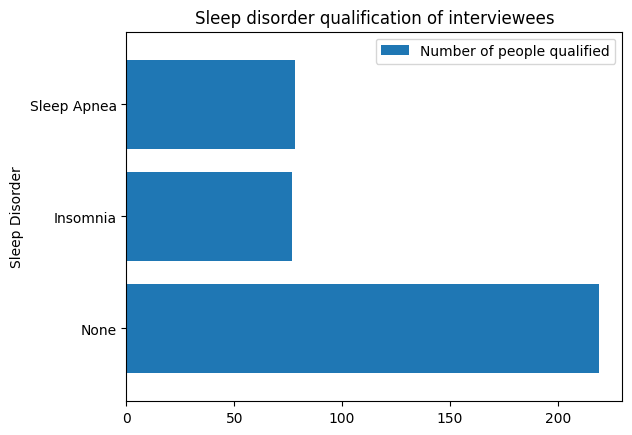

In [ ]:
extracted_data =[['None', df['Sleep Disorder'].str.contains('None', regex = False).sum()],
['Insomnia', df['Sleep Disorder'].str.contains('Insomnia', regex = False).sum()],
['Sleep Apnea', df['Sleep Disorder'].str.contains('Sleep Apnea', regex = False).sum()],
]

df3 = pd.DataFrame(extracted_data, columns=['Sleep Disorder', 'Number of people qualified'])
df3.plot(x='Sleep Disorder', kind = 'barh', grid=False, width=0.8, title="Sleep disorder qualification of interviewees")

#Around the half of interviewed people have no sleeping disorders. Its good to notice before analysing future plots.


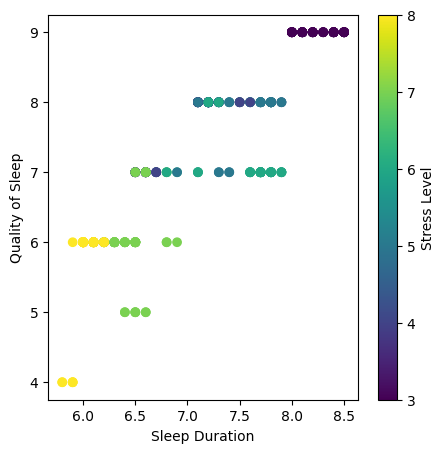

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df['Sleep Duration'], df['Quality of Sleep'], c=df['Stress Level'], cmap='viridis')
plt.colorbar(label = 'Stress Level')
plt.xlabel("Sleep Duration")
plt.ylabel("Quality of Sleep")
plt.show()

#We can notice that quality of sleep is highly corelated with its length, the longer sleep duration, the higher quality. We can also notice that people who sleep short are more affected by stress.

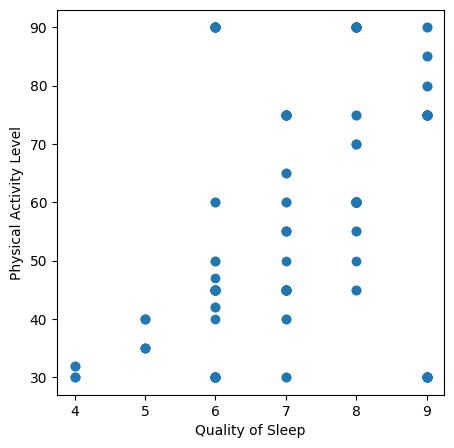

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df['Quality of Sleep'], df['Physical Activity Level'])
plt.ylabel("Physical Activity Level")
plt.xlabel("Quality of Sleep")
plt.show()

#We can see a corelation between the quality of sleep and physical activity level, people who are more active, get better quality sleep.

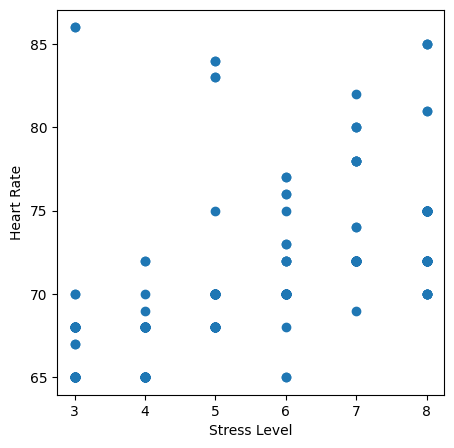

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df['Stress Level'], df['Heart Rate'])
plt.ylabel("Heart Rate")
plt.xlabel("Stress Level")
plt.show()

#We can notice that heart rate slightly increases with the stress level.

<Axes: xlabel='count', ylabel='Age'>

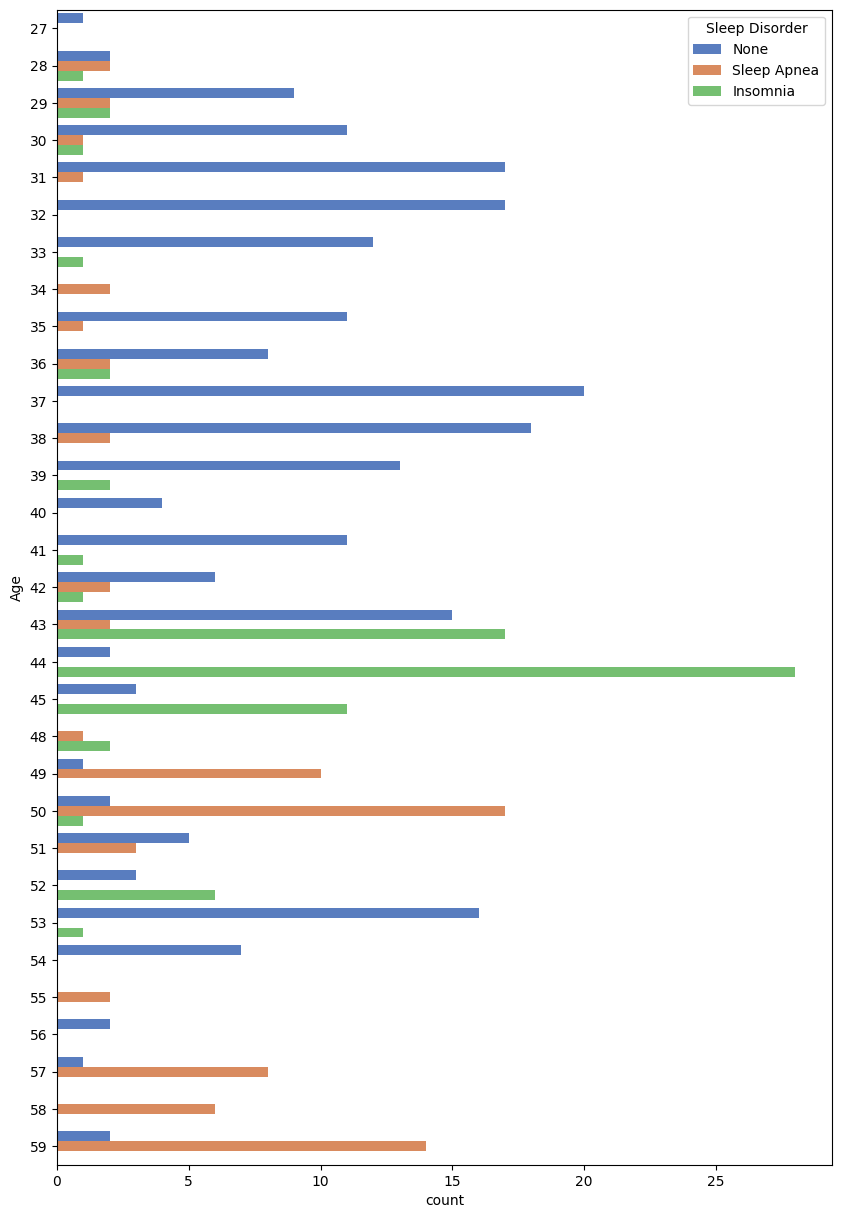

In [ ]:
plt.figure(figsize = (10,15))
sns.countplot(y = 'Age', hue = 'Sleep Disorder', width = 0.8, palette = 'muted', data=df)

#We can notice that most of the sleep disorders concern people in their 40s and older.

<Axes: xlabel='count', ylabel='Occupation'>

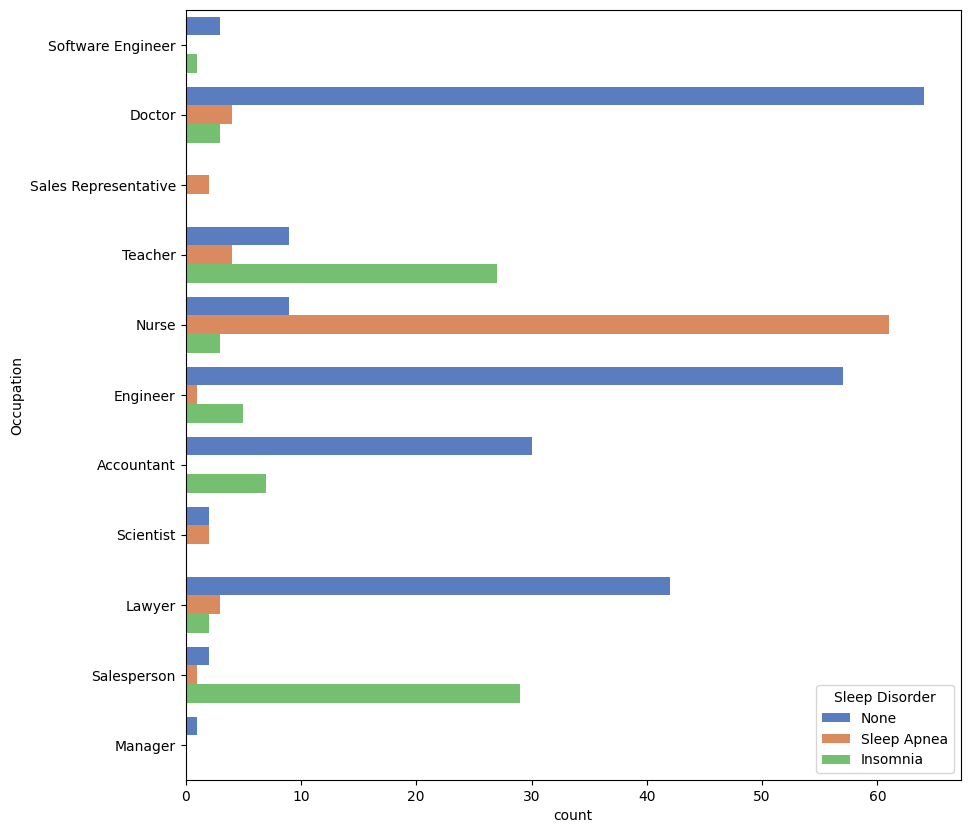

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'Occupation', hue = 'Sleep Disorder', width = 0.8, palette = 'muted', data=df)

#We can also notice that most afftected by sleeping disorders occupations are nurse, teacher and salesperson.

In [ ]:
young = df.loc[(df['Age'] < 30)]
adult = df.loc[(df['Age'] >=30) & (df['Age'] < 50)]
old = df.loc[(df['Age'] >= 50)]

young.describe()

#Looking for statistics for people below 30.

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,10.000000,28.631579,6.468421,5.789474,44.842105,7.315789,74.947368,6563.157895
std,5.627314,0.597265,0.727288,0.976328,18.497036,0.885226,6.022861,2477.276849
min,1.000000,27.000000,5.900000,4.000000,30.000000,6.000000,70.000000,3000.000000
25%,5.500000,28.000000,6.000000,5.500000,30.000000,6.500000,70.000000,4000.000000
50%,10.000000,29.000000,6.100000,6.000000,40.000000,8.000000,70.000000,8000.000000
75%,14.500000,29.000000,6.500000,6.000000,60.000000,8.000000,80.000000,8000.000000
max,19.000000,29.000000,7.800000,7.000000,75.000000,8.000000,85.000000,10000.000000


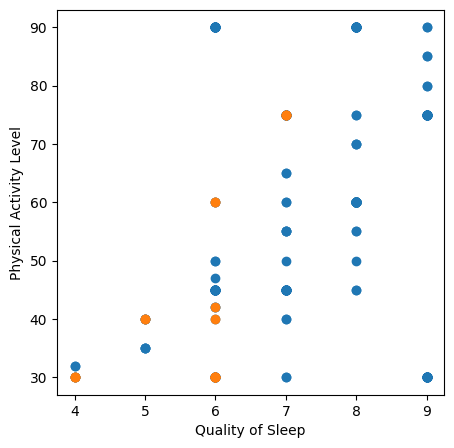

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df['Quality of Sleep'], df['Physical Activity Level'])
plt.scatter(young['Quality of Sleep'], young['Physical Activity Level'])
plt.ylabel("Physical Activity Level")
plt.xlabel("Quality of Sleep")
plt.show()

#Young people are less active and have worse quality of sleep.